In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data = pd.read_excel("/Users/yamanjoshi/Downloads/Statistics Projects/DATASTOR.xlsx")

In [52]:
data

,Week,Day,Shift,Hours,Drives,ShiftPDQ
0,1,1,1,91.75,111,7.052
1,1,1,2,91.25,115,7.010
2,1,1,3,103.75,128,6.884
3,1,2,1,96.75,123,7.051
4,1,2,2,103.25,128,6.952
...,...,...,...,...,...,...
145,10,4,2,90.50,110,6.989
146,10,4,3,96.75,125,6.796
147,10,5,1,97.50,121,6.937
148,10,5,2,92.50,122,6.827


In [54]:
missing_count = data.isnull().sum()
print(missing_count)

Week        0
Day         0
Shift       0
Hours       0
Drives      0
ShiftPDQ    0
dtype: int64


In [56]:
columns = ['Hours', 'Drives', 'ShiftPDQ']

['Hours', 'Drives', 'ShiftPDQ']

In [58]:
summary_statistics = data[columns].describe(percentiles = [.25, .5, .75])
print(summary_statistics)

            Hours      Drives    ShiftPDQ
count  150.000000  150.000000  150.000000
mean    96.186667  120.393333    6.961393
std      4.852366    5.090980    0.133390
min     83.000000  108.000000    6.490000
25%     93.062500  117.000000    6.884750
50%     96.250000  120.000000    6.974500
75%     98.687500  124.000000    7.048750
max    110.500000  134.000000    7.267000


In [63]:
hours_worked = data["Hours"]
print(hours_worked)

0       91.75
1       91.25
2      103.75
3       96.75
4      103.25
        ...  
145     90.50
146     96.75
147     97.50
148     92.50
149     87.75
Name: Hours, Length: 150, dtype: float64


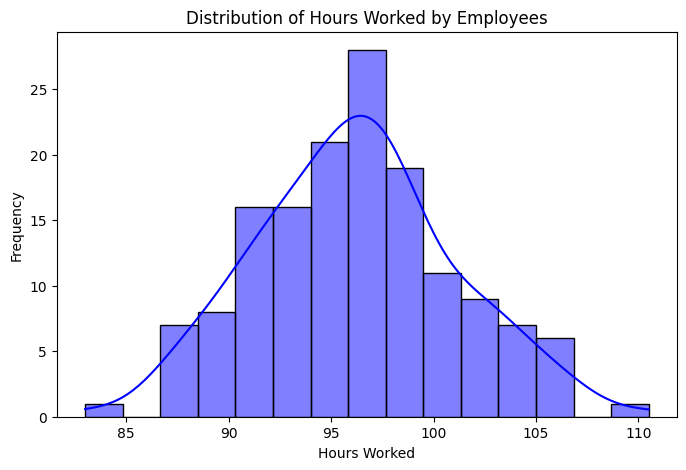

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(data["Hours"], bins=15, kde=True, color="blue")
plt.xlabel("Hours Worked")
plt.ylabel("Frequency")
plt.title("Distribution of Hours Worked by Employees")
plt.show()

In [64]:
drives_produced = data["Drives"]
print(drives_produced)

0      111
1      115
2      128
3      123
4      128
      ... 
145    110
146    125
147    121
148    122
149    111
Name: Drives, Length: 150, dtype: int64


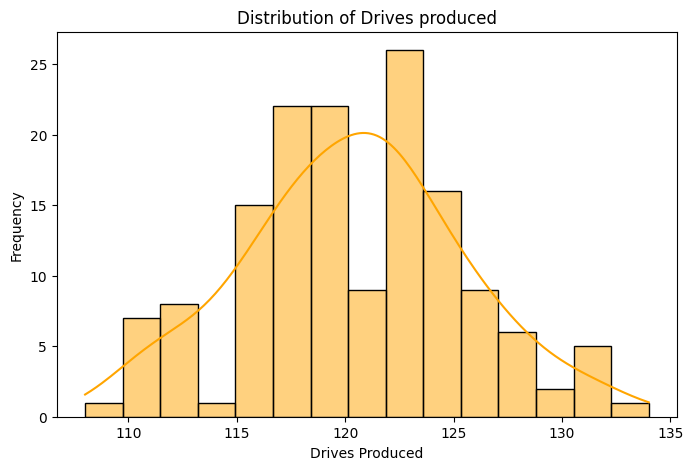

In [65]:
plt.figure(figsize=(8,5))
sns.histplot(data["Drives"], bins=15, kde=True, color="orange")
plt.xlabel("Drives Produced")
plt.ylabel("Frequency")
plt.title("Distribution of Drives produced")
plt.show()

In [66]:
performance_score = data["ShiftPDQ"]
print(performance_score)

0      7.052
1      7.010
2      6.884
3      7.051
4      6.952
       ...  
145    6.989
146    6.796
147    6.937
148    6.827
149    6.841
Name: ShiftPDQ, Length: 150, dtype: float64


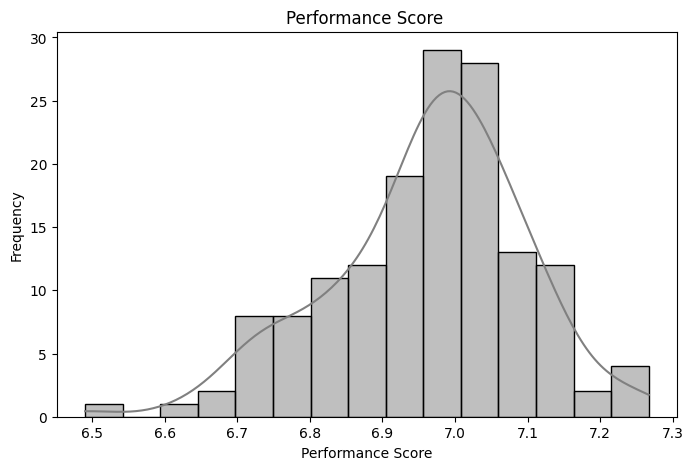

In [67]:
plt.figure(figsize=(8,5))
sns.histplot(data["ShiftPDQ"], bins=15, kde=True, color="gray")
plt.xlabel("Performance Score")
plt.ylabel("Frequency")
plt.title("Performance Score ")
plt.show()


In [69]:
from scipy.stats import norm

mu = 7.0  # Given mean
sigma = 0.30  # Given standard deviation
threshold = 6.2  # Given cutoff

probability = norm.cdf(threshold, loc=mu, scale=sigma)
print(f"Probability of ShiftPDQ < 6.2: {probability:.4f}")


Probability of ShiftPDQ < 6.2: 0.0038


In [73]:
average_thousand_defective = 1000 * probability 
print(average_thousand_defective)

3.83038056758974


In [74]:
from scipy.stats import norm

# Given parameters
mu = 7.0  # Mean PDQ
sigma = 0.30  # Standard deviation
threshold = 6.2  # Rejection threshold

# Probability of a single defective drive
p_defective = norm.cdf(threshold, loc=mu, scale=sigma)

# Probability of at least one defective drive in a sample of 10
p_reject = 1 - (1 - p_defective) ** 10

print(f"Probability of at least one rejected drive in 10 samples: {p_reject:.4f}")


Probability of at least one rejected drive in 10 samples: 0.0377


In [75]:
p_reject = 0.0377  # Given probability of daily rejection

expected_days = 1 / p_reject
print(f"Expected number of days until a rejection: {expected_days:.2f}")


Expected number of days until a rejection: 26.53


In [77]:
from scipy.stats import binom

# Parameters
n = 20  # Number of days (trials)
p = 0.0377  # Probability of rejection on any given day 

# Possible number of rejections (0 to 20)
x = np.arange(0, n+1)

# Calculate binomial probabilities
probabilities = binom.pmf(x, n, p)

# Print the probabilities
for i, prob in zip(x, probabilities):
    print(f"Probability of {i} rejections: {prob:.4f}")

Probability of 0 rejections: 0.4637
Probability of 1 rejections: 0.3633
Probability of 2 rejections: 0.1352
Probability of 3 rejections: 0.0318
Probability of 4 rejections: 0.0053
Probability of 5 rejections: 0.0007
Probability of 6 rejections: 0.0001
Probability of 7 rejections: 0.0000
Probability of 8 rejections: 0.0000
Probability of 9 rejections: 0.0000
Probability of 10 rejections: 0.0000
Probability of 11 rejections: 0.0000
Probability of 12 rejections: 0.0000
Probability of 13 rejections: 0.0000
Probability of 14 rejections: 0.0000
Probability of 15 rejections: 0.0000
Probability of 16 rejections: 0.0000
Probability of 17 rejections: 0.0000
Probability of 18 rejections: 0.0000
Probability of 19 rejections: 0.0000
Probability of 20 rejections: 0.0000


In [78]:
#DataStor are experencing at least 4 rejection 
# Calculate P(X >= 4)
prob_x_less_than_4 = binom.cdf(3, n, p)  
prob_x_ge_4 = 1 - prob_x_less_than_4  # P(X >= 4)

# Print the result
print(f"Probability that X >= 4: {prob_x_ge_4:.4f}")

Probability that X >= 4: 0.0060


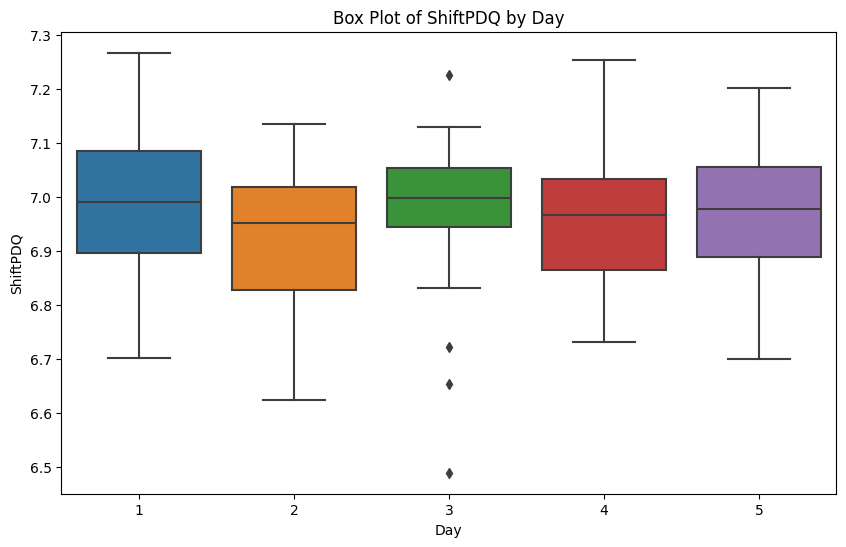

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day', y='ShiftPDQ', data=data)

# Customize plot
plt.title('Box Plot of ShiftPDQ by Day')
plt.xlabel('Day')
plt.ylabel('ShiftPDQ')

# Show the plot
plt.show()

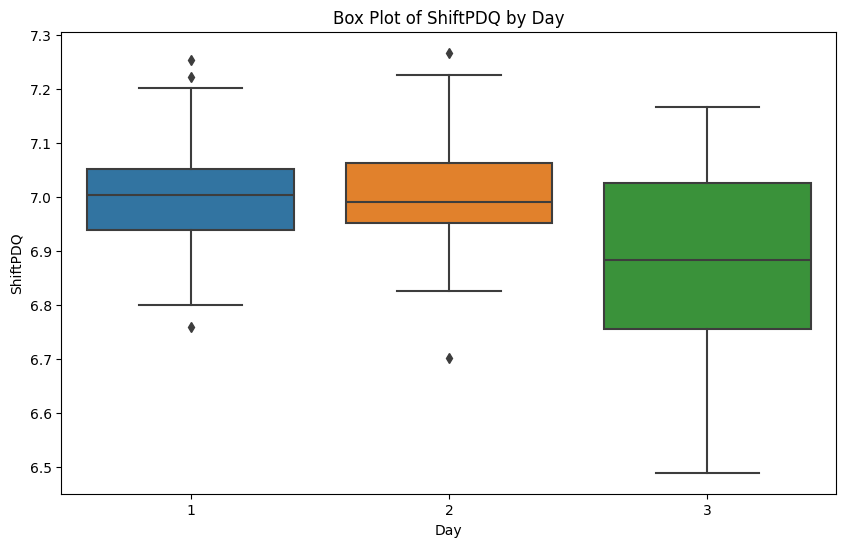

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shift', y='ShiftPDQ', data=data)

# Customize plot
plt.title('Box Plot of ShiftPDQ by Day')
plt.xlabel('Day')
plt.ylabel('ShiftPDQ')

# Show the plot
plt.show()

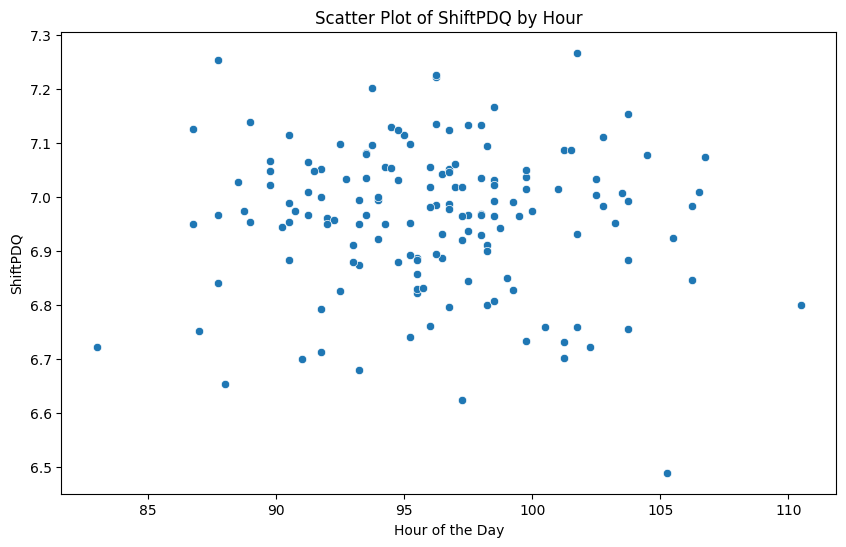

In [84]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='Hours', y='ShiftPDQ', data=data)

# Customize plot
plt.title('Scatter Plot of ShiftPDQ by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('ShiftPDQ')

# Show the plot
plt.show()

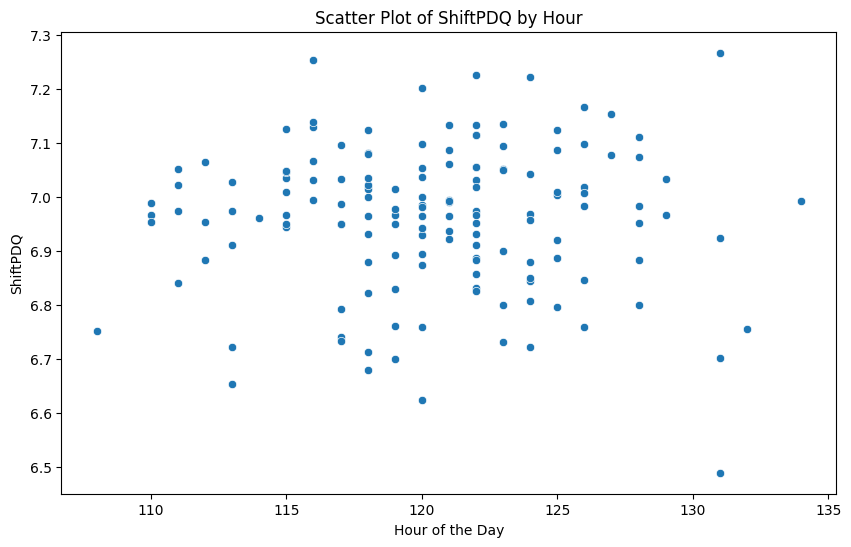

In [88]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='Drives', y='ShiftPDQ', data=data)

# Customize plot
plt.title('Scatter Plot of ShiftPDQ by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('ShiftPDQ')

# Show the plot
plt.show()

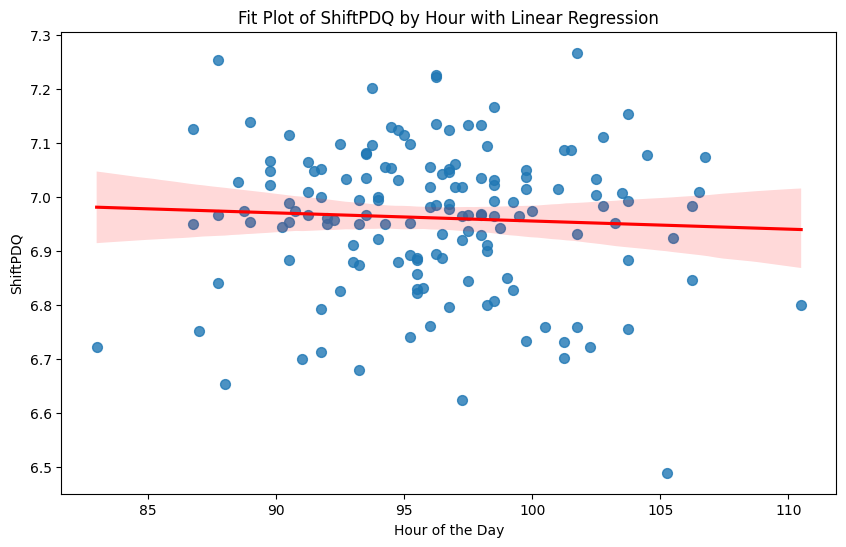

In [90]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with a linear regression line
sns.regplot(x='Hours', y='ShiftPDQ', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci = 95)

# Customize plot
plt.title('Fit Plot of ShiftPDQ by Hour with Linear Regression')
plt.xlabel('Hour of the Day')
plt.ylabel('ShiftPDQ')

# Show the plot
plt.show()

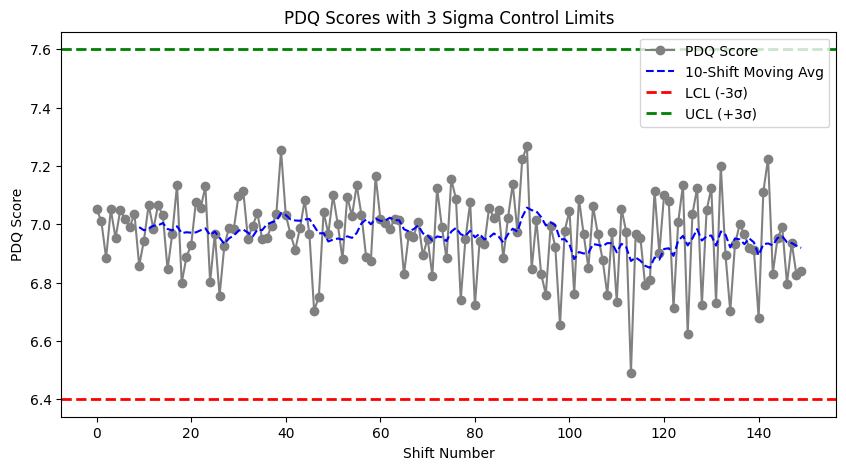

In [96]:
data["Rolling_Mean"] = data["ShiftPDQ"].rolling(window=10).mean()

# Create the plot
plt.figure(figsize=(10,5))
plt.plot(data.index, data["ShiftPDQ"], marker='o', linestyle='-', label="PDQ Score", color="gray")
plt.plot(data.index, data["Rolling_Mean"], linestyle="dashed", label="10-Shift Moving Avg", color="blue")

# Set 3-sigma control limits
LCL = 6.4 # Lower Control Limit (3σ)
UCL = 7.6  # Upper Control Limit (3σ)

# Add horizontal lines for control limits
plt.axhline(LCL, color='red', linestyle='dashed', linewidth=2, label="LCL (-3σ)")
plt.axhline(UCL, color='green', linestyle='dashed', linewidth=2, label="UCL (+3σ)")

# Customize plot
plt.xlabel("Shift Number")
plt.ylabel("PDQ Score")
plt.legend()
plt.title("PDQ Scores with 3 Sigma Control Limits")
plt.show()